In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


In [27]:
data = pd.read_csv('data/AirPassengers.csv')

In [28]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [29]:
data.describe

<bound method NDFrame.describe of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [30]:
# Count the NaN values in each column
nan_count = data['#Passengers'].isna().sum()
nan_count

0

In [31]:
# Calculate the mean value excluding NaNs
mean_value = data['#Passengers'].mean()

# Fill NaN values with the mean value
data['#Passengers'].fillna(mean_value, inplace=True)

In [32]:
# Convert the 'Month' column to a datetime type
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Set the 'Month' column as the index
data.set_index('Month', inplace=True)


In [33]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


In [34]:
# Find the best ARIMA parameters using auto_arima
model = auto_arima(train_data, seasonal=False, suppress_warnings=True)

# Fit the ARIMA model with the best parameters
arima_model = ARIMA(train_data, order=model.order)
arima_model_fit = arima_model.fit()


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
forecast_values = arima_model_fit.predict(start=len(train_data), end=len(data)-1)
forecast_dates = pd.date_range(start=data.index[train_size], periods=len(forecast_values), freq='M')
forecast = pd.Series(forecast_values, index=forecast_dates)


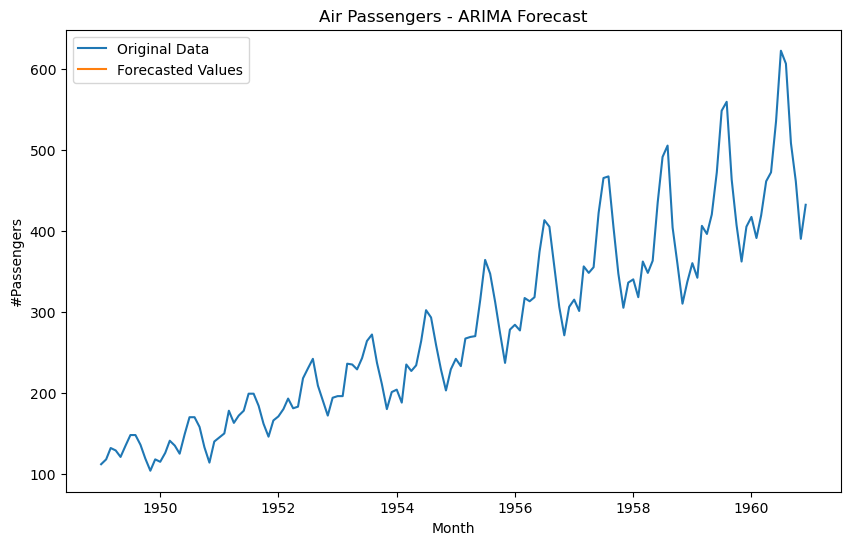

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecasted Values')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Air Passengers - ARIMA Forecast')
plt.legend()
plt.show()


In [37]:
mod_time = forecast


### Predict the value for next 20 years & store the result in 'pred_time'

In [41]:
forecast_values = arima_model_fit.predict(start=len(data), end=len(data) + 19)
forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=len(forecast_values), freq='M')
forecast = pd.Series(forecast_values, index=forecast_dates)
forecast = forecast.fillna(0)  # Fill NaN values with 0


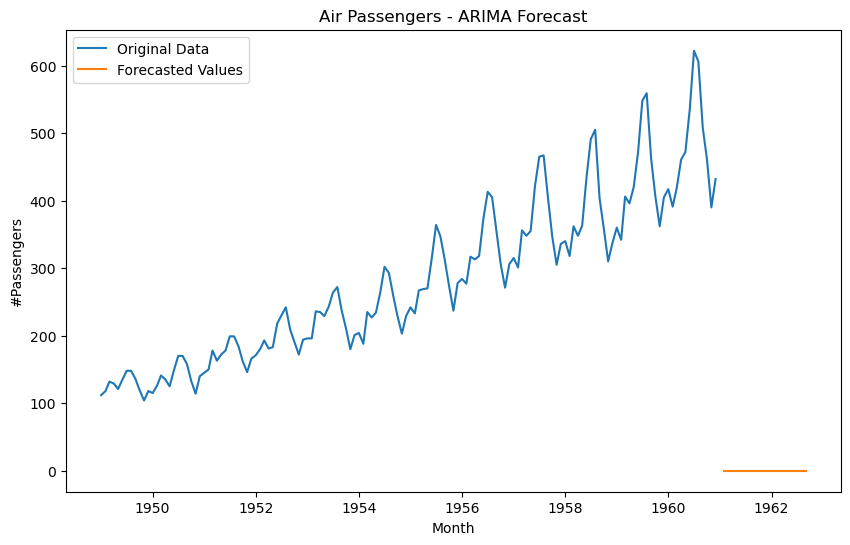

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecasted Values')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Air Passengers - ARIMA Forecast')
plt.legend()
plt.show()


In [43]:
pred_time = forecast


In [44]:
pred_time

1961-01-31    0.0
1961-02-28    0.0
1961-03-31    0.0
1961-04-30    0.0
1961-05-31    0.0
1961-06-30    0.0
1961-07-31    0.0
1961-08-31    0.0
1961-09-30    0.0
1961-10-31    0.0
1961-11-30    0.0
1961-12-31    0.0
1962-01-31    0.0
1962-02-28    0.0
1962-03-31    0.0
1962-04-30    0.0
1962-05-31    0.0
1962-06-30    0.0
1962-07-31    0.0
1962-08-31    0.0
Freq: M, Name: predicted_mean, dtype: float64

### Plot the actual values & the predicted values.

In [45]:
prediction_data = pd.concat([data['#Passengers'], forecast], axis=0)
prediction_data

1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1962-04-30      0.0
1962-05-31      0.0
1962-06-30      0.0
1962-07-31      0.0
1962-08-31      0.0
Length: 164, dtype: float64

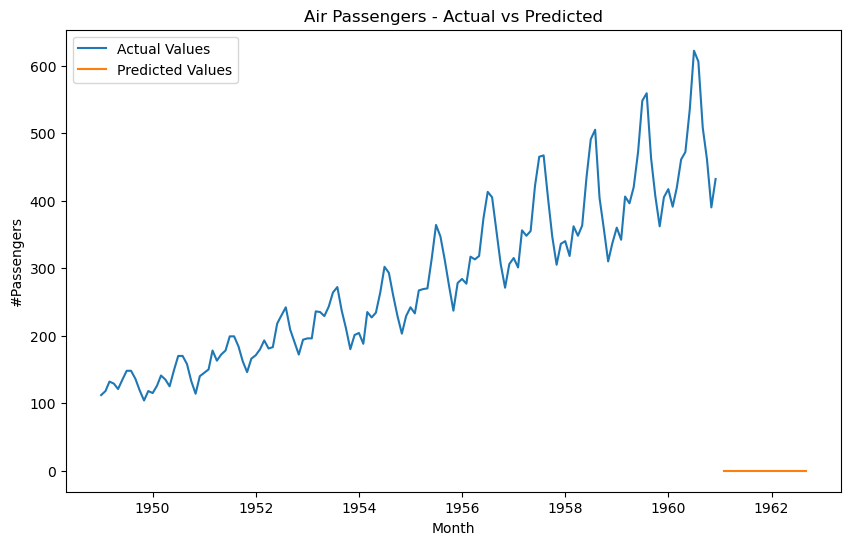

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['#Passengers'], label='Actual Values')
plt.plot(forecast.index, forecast, label='Predicted Values')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('Air Passengers - Actual vs Predicted')
plt.legend()
plt.show()
